In [1]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import os
import numpy as np
import tensorflow as tf
import cv2

import keras
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
image_path = '\\Users\\Paul-DS\\Downloads\\Final_Project\\animal_outline_images'
categs = os.listdir(image_path)

In [3]:
data=[]
labels=[]
categories = []
i = 0
#categs = os.listdir(image_path)
for categ in categs:
    #print(categ)
    categories.append([i,categ])
    animalpics = os.listdir(image_path + "\\" + categ)
    #print(animalpics)
    for animalpic in animalpics:
        #print(animalpic)
        try:
            #print(image_path + "\\" + categ + "\\original\\" + animalpic)
            animal_image = cv2.imread(image_path + "\\" + categ + "\\" + animalpic)
            #print(animal_image)
            #new_array = cv2.resize(img_array, (50, 50))
            img_from_ar = Image.fromarray(animal_image)
            resized_image = img_from_ar.resize((50, 50))
            data.append(np.array(resized_image))
            #training_data.append([new_array, class_num])  # add this to our training_data
            labels.append(i)
            #print(data)
            #print(labels)
        except:
            pass
    i = i +1

In [4]:
print(categories)

[[0, 'bats'], [1, 'ducks'], [2, 'penguins'], [3, 'rhinos'], [4, 'spiders'], [5, 'turtles']]


In [4]:
animals=np.array(data)
labels=np.array(labels)
s=np.arange(animals.shape[0])
np.random.shuffle(s)
animals=animals[s]
labels=labels[s]
num_classes=len(np.unique(labels))
data_length=len(animals)
(x_train,x_test)=animals[(int)(0.1*data_length):],animals[:(int)(0.1*data_length)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_length=len(x_train)
test_length=len(x_test)

In [6]:
train_length

2151

In [7]:
test_length

239

In [5]:
(y_train,y_test)=labels[(int)(0.1*data_length):],labels[:(int)(0.1*data_length)]

In [6]:
from keras.utils import np_utils
#One hot encoding
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [10]:
x_train.shape[1:]

(50, 50, 3)

In [7]:
# import sequential model and all the required layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#make model
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu",input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense((i),activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
__________

In [8]:
from keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), 
                  metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,batch_size=26
          ,epochs=50, verbose=1, validation_data=(x_test, y_test))

Train on 2151 samples, validate on 239 samples
Epoch 1/50
2151/2151 [==============================] - 5s 2ms/step - loss: 1.7863 - acc: 0.2208 - val_loss: 1.7668 - val_acc: 0.2720
Epoch 2/50
2151/2151 [==============================] - 5s 2ms/step - loss: 1.7666 - acc: 0.2538 - val_loss: 1.7484 - val_acc: 0.2552
Epoch 3/50
2151/2151 [==============================] - 5s 2ms/step - loss: 1.7449 - acc: 0.2729 - val_loss: 1.7185 - val_acc: 0.2720
Epoch 4/50
2151/2151 [==============================] - 5s 2ms/step - loss: 1.7188 - acc: 0.2915 - val_loss: 1.6977 - val_acc: 0.3054
Epoch 5/50
2151/2151 [==============================] - 5s 2ms/step - loss: 1.6852 - acc: 0.3175 - val_loss: 1.6711 - val_acc: 0.3180
Epoch 6/50
2151/2151 [==============================] - 5s 2ms/step - loss: 1.6532 - acc: 0.3319 - val_loss: 1.6654 - val_acc: 0.3180
Epoch 7/50
2151/2151 [==============================] - 5s 3ms/step - loss: 1.6409 - acc: 0.3375 - val_loss: 1.6174 - val_acc: 0.3305
Epoch 8/50
2151

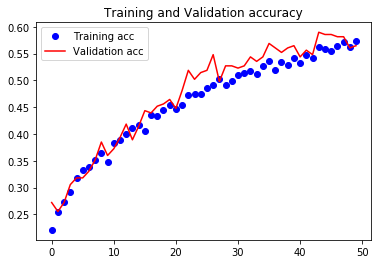

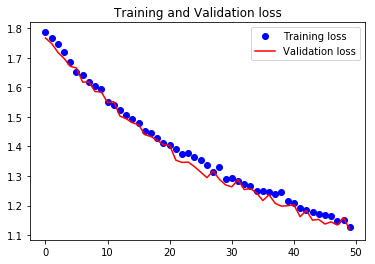

In [12]:
# 26, 50
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.title('Training and Validation accuracy')
plt.legend()
plt.savefig('line_drawings_final_curve_fit_acc.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and Validation loss')
plt.legend()

plt.savefig('line_drawings_final_curve_fit_loss.png')
plt.show()

In [11]:
model.save('line_drawings_dataset_cnn_32_64_64_16_26_50.h5')

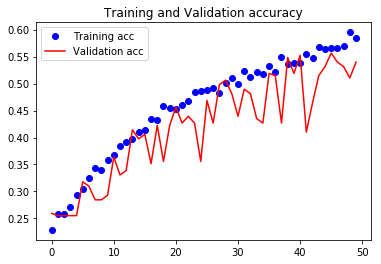

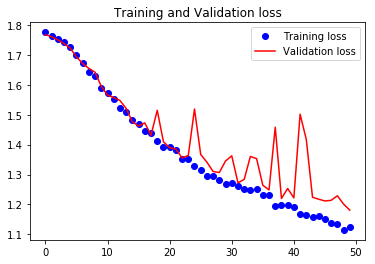

In [10]:
# 24, 50
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.title('Training and Validation accuracy')
plt.legend()
#plt.savefig('final_curve_fit_acc.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and Validation loss')
plt.legend()

#plt.savefig('final_curve_fit_loss.png')
plt.show()

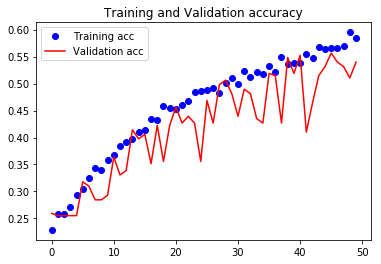

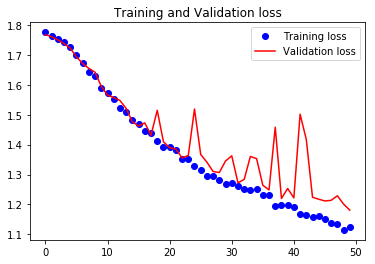

In [10]:
# 25, 50
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.title('Training and Validation accuracy')
plt.legend()
#plt.savefig('final_curve_fit_acc.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and Validation loss')
plt.legend()

#plt.savefig('final_curve_fit_loss.png')
plt.show()

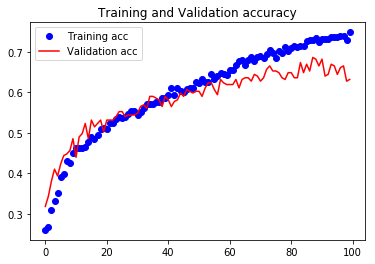

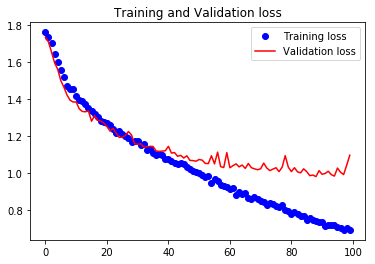

In [27]:
# 15, 100
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.title('Training and Validation accuracy')
plt.legend()
#plt.savefig('final_curve_fit_acc.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and Validation loss')
plt.legend()

#plt.savefig('final_curve_fit_loss.png')
plt.show()

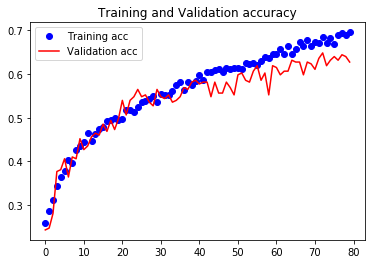

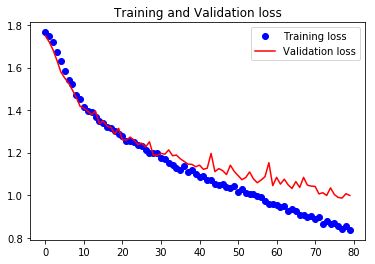

In [10]:
# 18, 80
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.title('Training and Validation accuracy')
plt.legend()
#plt.savefig('final_curve_fit_acc.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and Validation loss')
plt.legend()

#plt.savefig('final_curve_fit_loss.png')
plt.show()

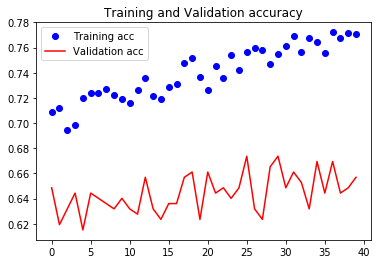

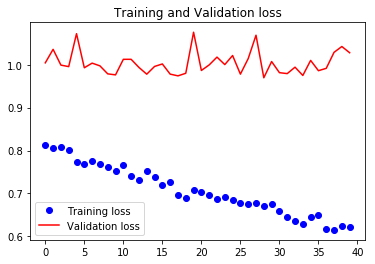

In [21]:
# 20, 80
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.title('Training and Validation accuracy')
plt.legend()
#plt.savefig('final_curve_fit_acc.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and Validation loss')
plt.legend()

#plt.savefig('final_curve_fit_loss.png')
plt.show()

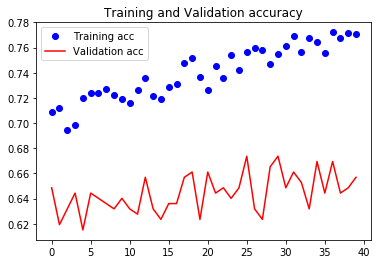

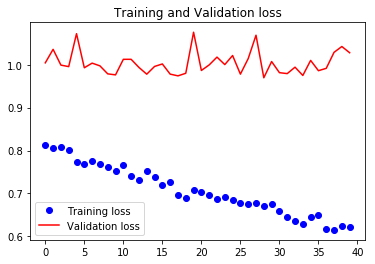

In [17]:
# 17, 40
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color='red')
plt.title('Training and Validation accuracy')
plt.legend()
#plt.savefig('final_curve_fit_acc.png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and Validation loss')
plt.legend()

#plt.savefig('final_curve_fit_loss.png')
plt.show()

In [14]:
eval_score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', eval_score[1])

239/239 [==============================] - 0s 708us/step

 Test accuracy: 0.5648535568594434


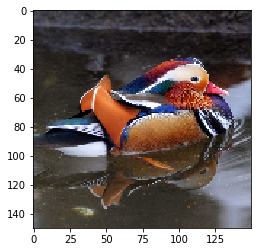

In [18]:
from keras.preprocessing import image
image_size = (150, 150)
# Load the image and resize to default image size
test_image_path = os.path.join("..", "Downloads\\Images", "duck1.jpg")
img = image.load_img(test_image_path, target_size=image_size)
#np.expand_dims(img_)
plt.imshow(img)

In [19]:
im = cv2.imread(test_image_path)
img = Image.fromarray(im)
image2 = img.resize((50, 50))
ar = np.array(image2)
ar=ar/255
label=1
a=[]
a.append(ar)
a=np.array(a)

1/1 [==============================] - 0s 2ms/step


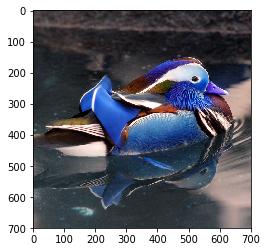

In [20]:
# Make predictions
score = model.predict(a, verbose=1)
#print('Predicted:', decode_predictions(predictions, top=3))
plt.imshow(img)

In [21]:
list_cat_scores = []
for itm in range(i):
    cat_scores = [categories[itm][1], score.item(itm)]
    list_cat_scores.append(cat_scores)
    
from operator import itemgetter
sorted_cat_scores = sorted(list_cat_scores, key=itemgetter(1), reverse=True)
sorted_cat_scores

[['bats', 0.29492902755737305],
 ['rhinos', 0.28597205877304077],
 ['spiders', 0.20068813860416412],
 ['ducks', 0.12711799144744873],
 ['turtles', 0.08130964636802673],
 ['penguins', 0.0099831847473979]]